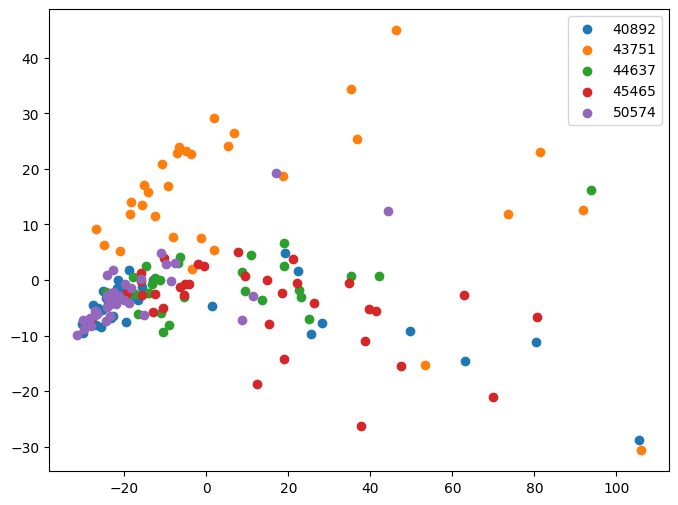

In [2]:
from sklearn.decomposition import PCA
import torchvision
import matplotlib.pyplot as plt
import numpy as np

dataset_path = "data/astrosite/spectrograms"
# dataset_path="data/astrosite/surfaces"
transform = torchvision.transforms.ToTensor()
target_transform = None

dataset = torchvision.datasets.ImageFolder(
    dataset_path, transform=transform, target_transform=target_transform
)


# Flatten the spectrogram images and apply PCA
def apply_pca(dataset, n_components=2):
    data = []
    labels = []
    for img, label in dataset:
        data.append(img.view(-1).numpy())
        labels.append(label)
    data = np.array(data)
    pca = PCA(n_components=n_components)
    transformed_data = pca.fit_transform(data)
    return transformed_data, labels


transformed_data, labels = apply_pca(dataset, n_components=2)


# Plot the PCA results
def plot_pca(transformed_data, labels):
    plt.figure(figsize=(8, 6))
    for class_idx in np.unique(labels):
        indices = np.where(np.array(labels) == class_idx)
        plt.scatter(
            transformed_data[indices, 0],
            transformed_data[indices, 1],
            label=dataset.classes[class_idx],
        )
    plt.legend()
    plt.show()


plot_pca(transformed_data, labels)

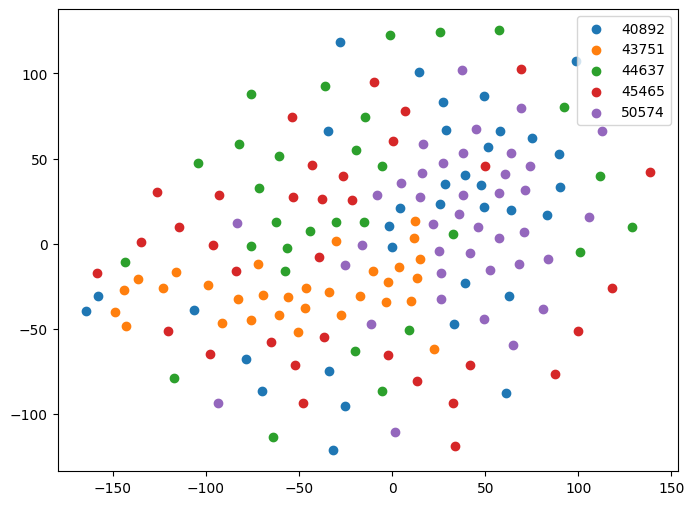

In [3]:
from sklearn.manifold import TSNE


def apply_tsne(dataset, n_components=2):
    data = []
    labels = []
    for img, label in dataset:
        data.append(img.view(-1).numpy())
        labels.append(label)
    data = np.array(data)
    tsne = TSNE(n_components=n_components, random_state=42)
    transformed_data = tsne.fit_transform(data)
    return transformed_data, labels


transformed_data, labels = apply_tsne(dataset)


# Plot the t-SNE results
def plot_tsne(transformed_data, labels):
    plt.figure(figsize=(8, 6))
    for class_idx in np.unique(labels):
        indices = np.where(np.array(labels) == class_idx)
        plt.scatter(
            transformed_data[indices, 0],
            transformed_data[indices, 1],
            label=dataset.classes[class_idx],
        )
    plt.legend()
    plt.show()


plot_tsne(transformed_data, labels)